Pergunta a serem respondidas:
- Qual melhor conjunto de mitigadores para um determinado modelo ?
- Alterar dataset, altera os melhores mitigadores para um determinado modelo?
- Para cada modelo, quanto piora de desempenho para ter a melhor justiça possível ?


In [ ]:
%reset -f

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("runs_adult_10x_1_mean_std.csv")


nonestring = 'X'
method_map = {
    "none": nonestring,
    "reweighing": "REW",
    "disparate_impact_remover": "DIR",
    "equalized_odds_postprocessing": "EOP",
    "reject_option_classification": "REJOC"
}

method_map_extenso = {
    "none": nonestring,
    "reweighing": "Reweighing",
    "disparate_impact_remover": "Disparate Impact Remover",
    "equalized_odds_postprocessing": "Equalized Odds PostProcessing",
    "reject_option_classification": "Reject Option Classification"
}

model_map = {
    "none": "None",
    "logistic_regression": "Logistic Reg.",
    "neural_network": "Neural Net.",
    "svm": "SVM",
    "decision_tree": "Decision Tree",
    "random_forest": "Random Forest",
    "xgboost": "XGBoost",
    "bernoulli_nb": "Naive Bayes"
}


metric_map_old = {
    "none": "None",
    "accuracy": "Acurácia",
    "balanced_accuracy": "Acurácia Balanceada",
    "precision": "Precisão",
    "recall": "Recall",
    "f1-score": "F1-Score",
    "roc_auc": "ROC-AUC",
    "demographic_parity_ratio": "Disparate Impact",
    "equal_odds_ratio": "Equalized Odds ",
    "equal_opportunity_ratio": "Equal Opportunity",
    "statistical_parity_difference": "Statistical Parity Diff",
    "average_predictive_value_difference": "Avg. Predictive Value Diff.",
    "average_odds_difference": "Avg. Odds Diff."

}

metric_map = {
    # Confusion matrix (globais)
    "true_positives": "VP",
    "true_negatives": "VN",
    "false_positives": "FP",
    "false_negatives": "FN",

    # Métricas clássicas de desempenho
    "accuracy": "Acurácia",
    "recall": "Recall",
    "specificity": "Especificidade (TNR)",
    "precision": "Precisão",
    "npv": "Valor Pred. Neg.(NPV)",
    "f1-score": "F1-Score",
    "balanced_accuracy": "Acurácia Balanceada",
    "roc_auc": "ROC-AUC",
    "pr_auc": "PR-AUC",
    "mcc": "Coef. de Matthews (MCC)",
    "log_loss": "Log Loss",
    "cohen_kappa_score": "Kappa de Cohen",
    "fbeta_score": "Fβ-Score",
    "jaccard_score": "Índice de Jaccard",
    "hamming_loss": "Hamming Loss",

    # Fairness – ratios
    "demographic_parity_ratio": "Disparate Impact",
    "equal_odds_ratio": "Equalized Odds Ratio",
    "predictive_parity_ratio": "Predictive Parity Ratio",
    "equal_opportunity_ratio": "Equal Opportunity Ratio",
    "tnr_ratio": "TNR Ratio",
    "fpr_ratio": "FPR Ratio",
    "npv_ratio": "NPV Ratio",
    "fnr_ratio": "FNR Ratio",
    "error_rate_ratio": "Error Rate Ratio",
    "false_positive_rate_ratio": "FPR Ratio",
    "false_discovery_rate_ratio": "FDR Ratio",
    "false_negative_rate_ratio": "FNR Ratio",
    "false_omission_rate_ratio": "FOR Ratio",

    # Fairness – diferenças
    "average_odds_difference": "Average Odds Diff.",
    "average_predictive_value_difference": "Avg. Predictive Value Diff.",
    "statistical_parity_difference": "Statistical Parity Diff.",
    "equalized_odds_difference": "Equalized Odds Diff.",
    "equal_opportunity_difference": "Equal Opportunity Diff.",
    "error_rate_difference": "Error Rate Diff.",
    "false_positive_rate_difference": "FPR Diff.",
    "false_discovery_rate_difference": "FDR Diff.",
    "false_negative_rate_difference": "FNR Diff.",
    "false_omission_rate_difference": "FOR Diff.",
    "true_positive_rate_difference": "TPR Diff.",

    # Métricas de desigualdade entre grupos
    "between_group_coefficient_of_variation": "Coef. de Variação ",
    "generalized_entropy_index": "Índ. Entropia Generalizada",
    "differential_fairness_bias_amplification": "Differential Fairness",

    # Confusion matrix por grupo
    "tp_privileged": "TP (Priv)",
    "tp_unprivileged": "TP (Unpriv)",
    "tn_privileged": "TN (Priv)",
    "tn_unprivileged": "TN Unpriv)",
    "fn_privileged": "FN (Priv)",
    "fn_unprivileged": "FN (Unpriv)",
    "fp_privileged": "FP (Priv)",
    "fp_unprivileged": "FP (Unpriv)",

    # Métricas por grupo
    "accuracy_privileged": "Acurácia (Priv)",
    "accuracy_unprivileged": "Acurácia (Unpriv)",
    "recall_privileged": "Recall (Priv)",
    "recall_unprivileged": "Recall (Unpriv)",
    "specificity_privileged": "Especificidade (Priv)",
    "specificity_unprivileged": "Especificidade (Unpriv)",
    "precision_privileged": "Precisão (Male)",
    "precision_unprivileged": "Precisão (Female)",
    "npv_privileged": "NPV (Priv)",
    "npv_unprivileged": "NPV (Unpriv)",

    # Taxas por grupo
    "selection_rate_privileged": "Selection Rate (Priv)",
    "selection_rate_unprivileged": "Selection Rate (Unpriv)",
    "false_positive_rate_privileged": "FPR (Priv)",
    "false_positive_rate_unprivileged": "FPR (Unpriv)",
    "false_negative_rate_privileged": "FNR (Priv)",
    "false_negative_rate_unprivileged": "FNR (Unpriv)",
    "false_discovery_rate_privileged": "FDR (Priv)",
    "false_discovery_rate_uprivileged": "FDR (Unpriv)",
    "false_omission_rate_privileged": "FOR (Priv)",
    "false_omission_rate_uprivileged": "FOR (Unpriv)",
    "error_rate_privileged": "Error Rate (Priv)",
    "error_rate_unprivileged": "Error Rate (Unpriv)"
}


markers_models = ["o", "s", "^", "D", "v", "<", ">", "*", "."]
markers_mitigation = ['o', 's', 'D', '^', 'v', 'P', 'X', '<', '>']
markers_metric = ['o', 's', '^', 'D', 'X', 'v', 'P', '*']

# === 1. Identifica o tipo de mitigação ===
def get_mitig_name(row):
    if row["pre"] != "none" and row["post"] == "none":
        return method_map.get(row["pre"], row["pre"])
    elif row["post"] != "none" and row["pre"] == "none":
        return method_map.get(row["post"], row["post"])
    elif row["pre"] != "none" and row["post"] != "none":
        pre_name = method_map.get(row["pre"], row["pre"])
        post_name = method_map.get(row["post"], row["post"])
        return f"{pre_name}+{post_name}"
    else:
        return "Baseline"


# Tabela de Resultados

In [ ]:
# Definição dos Mapas (Conforme seu código)
model_map_table = {
    "none": "None",
    "logistic_regression": "Regressão Logística",
    "neural_network": "Redes Neurais",
    "svm": "SVM Linear",
    "decision_tree": "Árvore de Decisão",
    "random_forest": "Floresta Aleatória",
    "xgboost": "XGBoost",
    "bernoulli_nb": "N. Bayes Bernoulli"
}

metric_map_table = {
    # Chave do CSV : Nome na Coluna Final
    "time_execution": "Tempo de exec.(s)",
    "accuracy": "Acurácia",
    "balanced_accuracy": "Acurácia Balanceada",
    "precision": "Precisão",
    "recall": "Recall",
    "f1-score": "F1-Score",
    "roc_auc": "ROC-AUC",
    "demographic_parity_ratio": "Disparate Impact",
    "equal_odds_ratio": "Equalized Odds Ratio",
    "average_predictive_value_difference": "Avg. Predictive Value Diff.",
    "equal_opportunity_ratio": "Equal Opportunity",
    "average_odds_difference  ": "Avg. Odds Difference"
}

#  Filtrar apenas os Baselines (pre=none E post=none)

baseline_df = df[(df['pre'] == 'none') & (df['post'] == 'none')].copy()

# Definir os nomes das colunas (Modelos)

model_columns = baseline_df['model'].map(model_map_table).tolist()

# Coloca os modelos na mems ordem do mapeamento
desired_order = [k for k in model_map_table.keys() if k != 'none']
baseline_df = baseline_df[baseline_df['model'].isin(desired_order)].copy()
baseline_df['model'] = pd.Categorical(
    baseline_df['model'],
    categories=desired_order,
    ordered=True
)
baseline_df = baseline_df.sort_values('model')

#  Atualiza a lista de nomes das colunas baseada no DF já ordenado
model_columns = baseline_df['model'].map(model_map_table).tolist()


# Dicionário para armazenar os dados
# A chave será o nome da Métrica (Linha) e o valor será a lista de resultados para cada modelo
data_rows = {}

for metric_key, metric_label in metric_map_table.items():
    if metric_key == "none": continue

    std_key = f"{metric_key}_std"

    # Verifica se as colunas (media e std) existem no CSV original
    if metric_key in baseline_df.columns and std_key in baseline_df.columns:

        # Cria a lista de strings formatadas para essa métrica (uma para cada modelo)
        formatted_values = [
            f"{mean:.2f} ± {std:.3f}"
            for mean, std in zip(baseline_df[metric_key], baseline_df[std_key])
        ]

        # Adiciona a linha ao dicionário
        data_rows[metric_label] = formatted_values

# Criar o DataFrame final
# orient='index' transforma as chaves do dicionário (Métricas) em índices de LINHA
# columns=model_columns nomeia as colunas com os modelos
final_table = pd.DataFrame.from_dict(data_rows, orient='index', columns=model_columns)


print("\n=== Tabela Transposta (Linhas=Métricas, Colunas=Modelos) ===")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(final_table.to_markdown())




# TABELA COM TODAS AS METRICAS

In [ ]:


metric_map_table2 = metric_map



# ==============================================================================
# 1. RECRIA A TABELA
# ==============================================================================
data_rows = {}

for metric_key, metric_label in metric_map_table2.items():
    if metric_key == "none": continue

    std_key = f"{metric_key}_std"

    if metric_key in baseline_df.columns and std_key in baseline_df.columns:
        # AQUI está a formatação que define o número de casas decimais
        formatted_values = [
            f"{mean:.2f} ± {std:.3f}"
            for mean, std in zip(baseline_df[metric_key], baseline_df[std_key])
        ]
        data_rows[metric_label] = formatted_values

# Cria o DataFrame com as strings novas
final_table = pd.DataFrame.from_dict(data_rows, orient='index', columns=model_columns)

# Exibe no terminal para você conferir
print("\n=== Prévia da Tabela (Terminal) ===")
print(final_table.to_markdown())

# Baseline x  Fairness

# UM modelo antes e depois da mitigação isolada

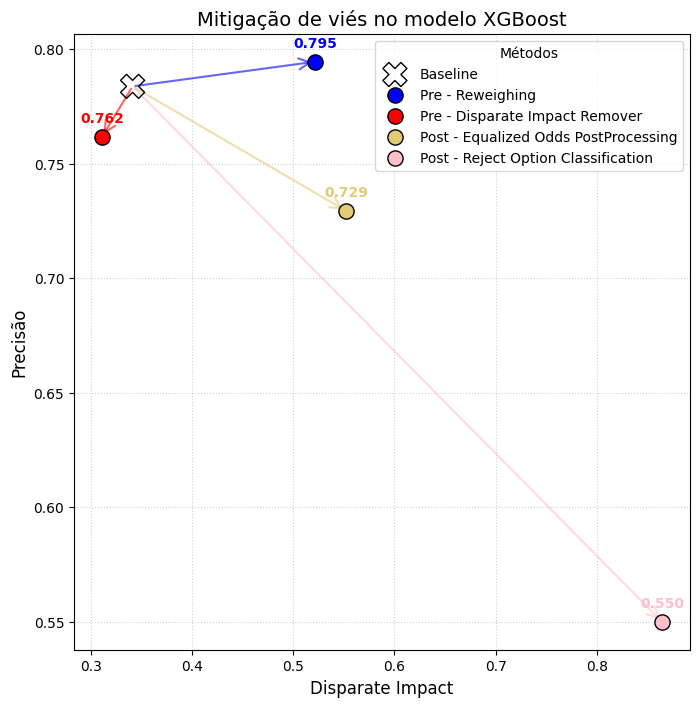

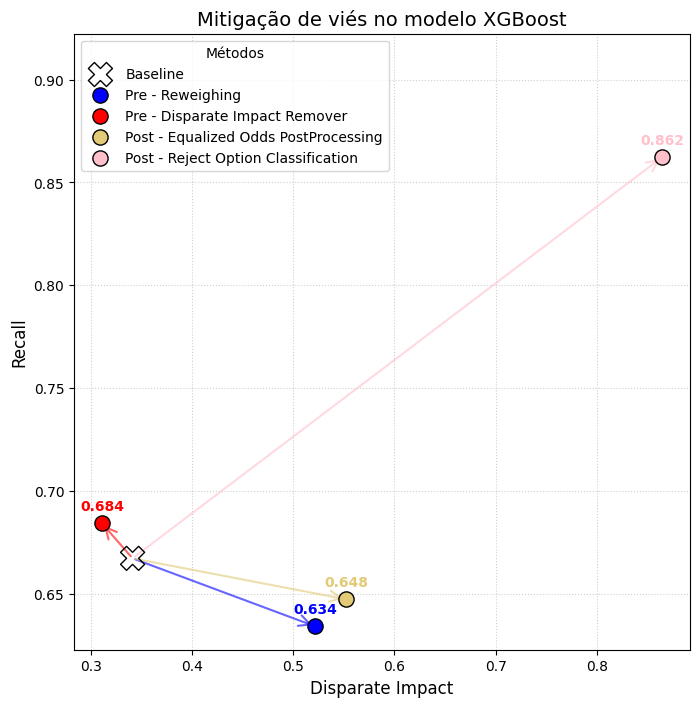

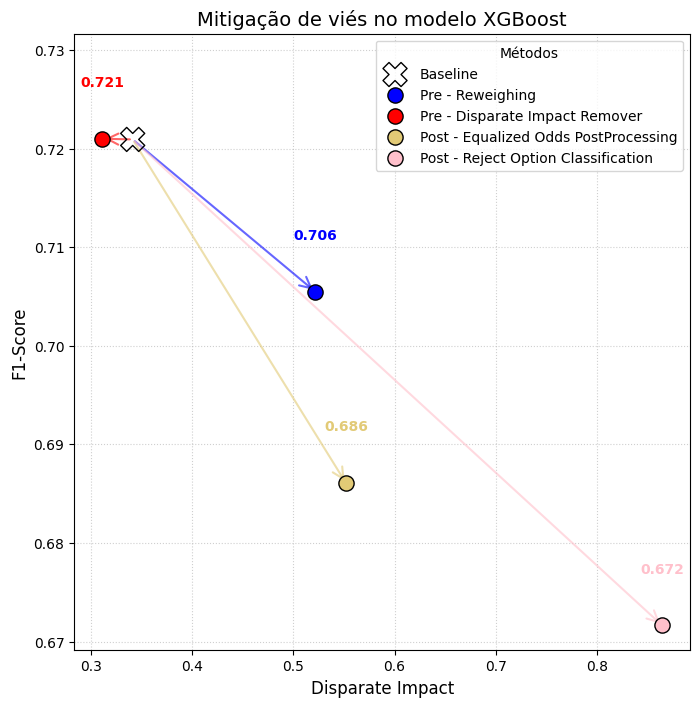

In [94]:

def plot_mitigation_shifts(df, model_key, metric_x, metric_y):
    """
    Plota o trade-off de um modelo comparando o Baseline com 4 mitigações.
    As linhas conectam o Baseline às mitigações para mostrar o impacto.
    """

    # 1. Definição das combinações (Pre, Post) para as 4 mitigações
    mitigations = [
        ("reweighing", "none"),
        ("disparate_impact_remover", "none"),
        ("none", "equalized_odds_postprocessing"),
        ("none", "reject_option_classification")
    ]

    # Cores fixas para cada método
    colors = ['blue', 'red', '#E2CA76', 'pink']
    plt.figure(figsize=(8, 8))
    ax = plt.gca()

    # 2. Pegar o ponto BASELINE (none, none)
    baseline_df = df[(df['model'] == model_key) & (df['pre'] == 'none') & (df['post'] == 'none')]

    if baseline_df.empty:
        print(f"Erro: Baseline não encontrado para {model_key}")
        return

    # Usamos a média do baseline (idxmax da performance no baseline se houver múltiplas rodadas)
    b_idx = baseline_df[metric_y].idxmax()
    base_point = baseline_df.loc[b_idx]

    # Plotar Ponto Baseline
    plt.scatter(base_point[metric_x], base_point[metric_y], facecolors='none',
                edgecolors='black', color='black', marker='X', s=300, label="Baseline", zorder=5)

    # 3. Iterar sobre as mitigações e traçar as conexões
    for i, (pre, post) in enumerate(mitigations):
        m_df = df[(df['model'] == model_key) & (df['pre'] == pre) & (df['post'] == post)]

        if m_df.empty:
            continue

        m_point = m_df.iloc[0]

        m_label = method_map2.get(pre if pre != "none" else post)

        m_color = colors[i]

        # Desenhar linha do Baseline -> Mitigação (com seta para indicar direção)
        plt.annotate('',
                     xy=(m_point[metric_x], m_point[metric_y]),
                     xytext=(base_point[metric_x], base_point[metric_y]),
                     arrowprops=dict(arrowstyle='->, head_length=0.8, head_width=0.4', color=m_color, lw=1.5, alpha=0.6))

        # Plotar o ponto da mitigação
        plt.scatter(m_point[metric_x], m_point[metric_y],
                    color=m_color, s=120, edgecolors='black', label=m_label, zorder=4)


        y_val = m_point[metric_y]
        plt.text(m_point[metric_x], m_point[metric_y] + 0.005,  # x, y + pequeno deslocamento
                 f'{y_val:.3f}',                               # Valor formatado (3 casas decimais)
                 color=m_color,                                # Mesma cor do ponto
                 fontsize=10,
                 fontweight='bold',
                 ha='center',                                  # Alinhamento horizontal
                 va='bottom' # Alinhamento vertical
                )



    #plt.xlim(0, 1)
    #plt.ylim(0, 1)
    y_min, y_max = plt.ylim()
    offset = 0.06  # margem adicional
    plt.ylim(y_min, max(y_max, y_val + offset))

    plt.xlabel(metric_map.get(metric_x, metric_x), fontsize=12)
    plt.ylabel(metric_map.get(metric_y, metric_y), fontsize=12)
    plt.title(f"Mitigação de viés no modelo {model_map.get(model_key, model_key)}", fontsize=14)

    plt.grid(True, linestyle=":", alpha=0.6)
    ax.set_box_aspect(1)

    # Legenda organizada
    #plt.legend(title="Métodos", bbox_to_anchor=(1.05, 1), loc=1)
    plt.legend(title="Métodos")
    filename = f"result_mitigation_{model_key}_{metric_x}_{metric_y}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

method_map2 = {
    "none": nonestring,
    "reweighing": "Pre - Reweighing",
    "disparate_impact_remover": "Pre - Disparate Impact Remover",
    "equalized_odds_postprocessing": "Post - Equalized Odds PostProcessing",
    "reject_option_classification": "Post - Reject Option Classification"
}


plot_mitigation_shifts(df, "xgboost", "demographic_parity_ratio", "precision")
plot_mitigation_shifts(df, "xgboost", "demographic_parity_ratio", "recall")
plot_mitigation_shifts(df, "xgboost", "demographic_parity_ratio", "f1-score")



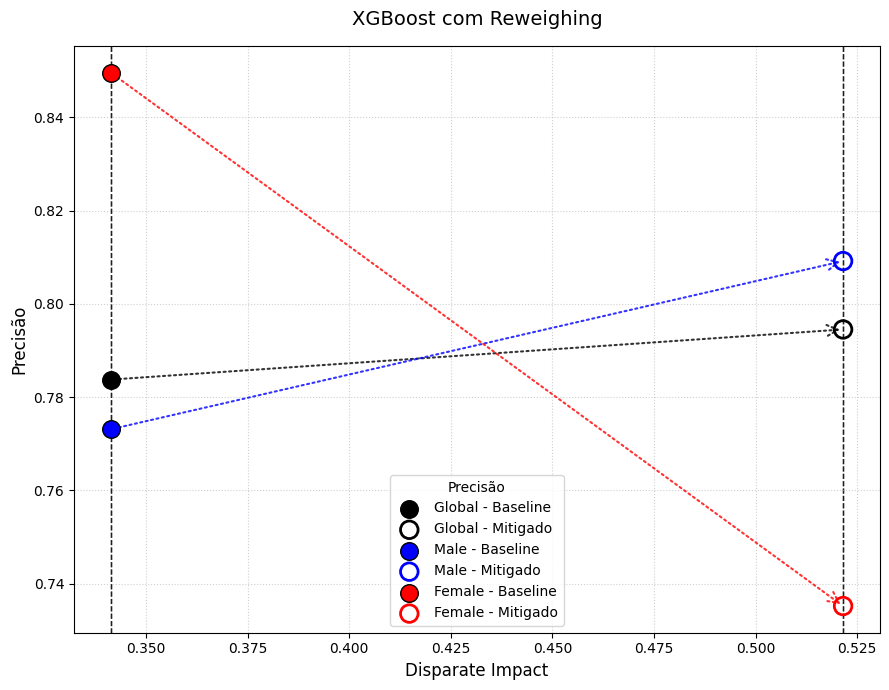

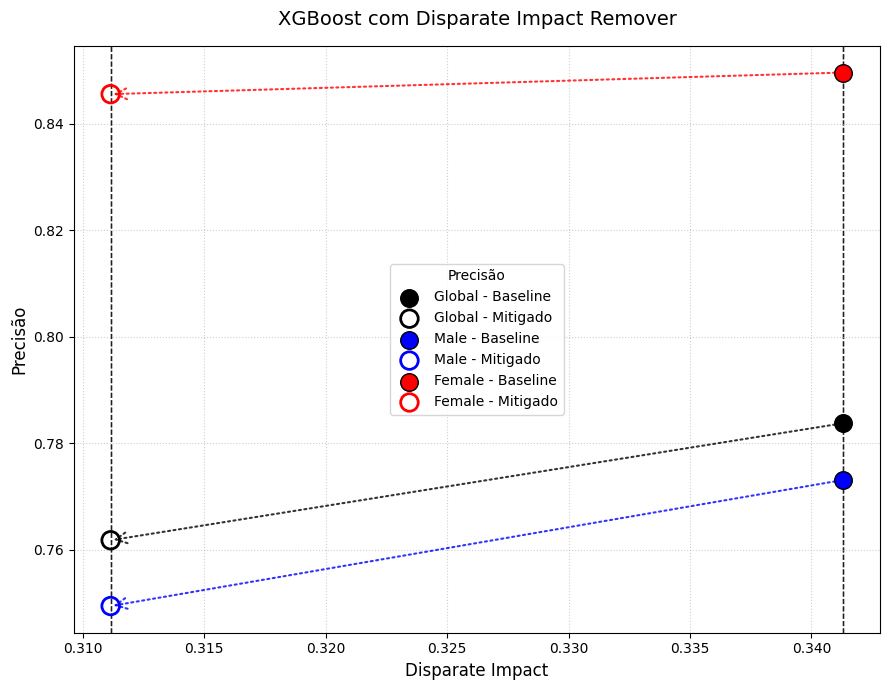

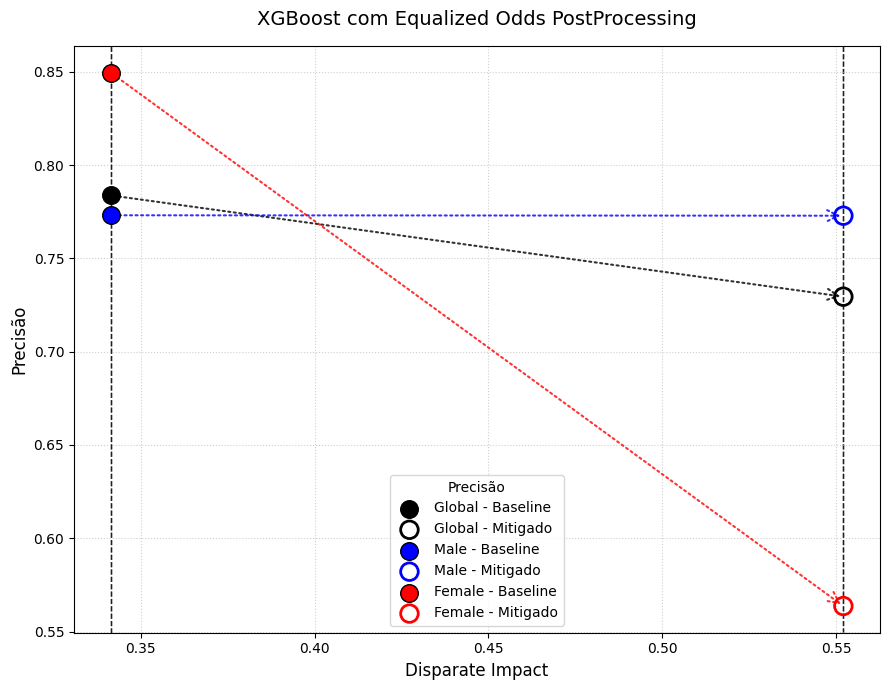

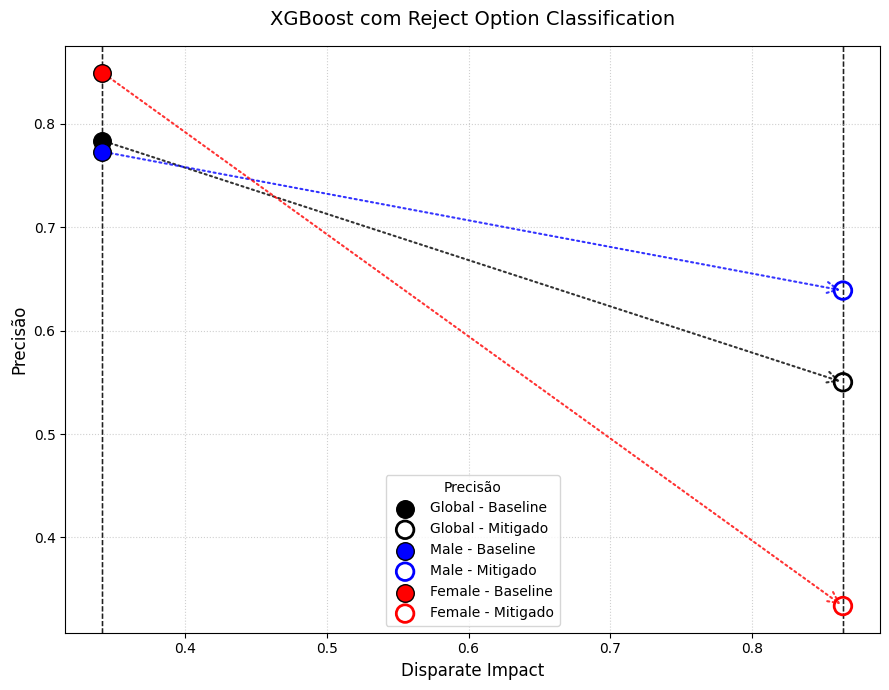

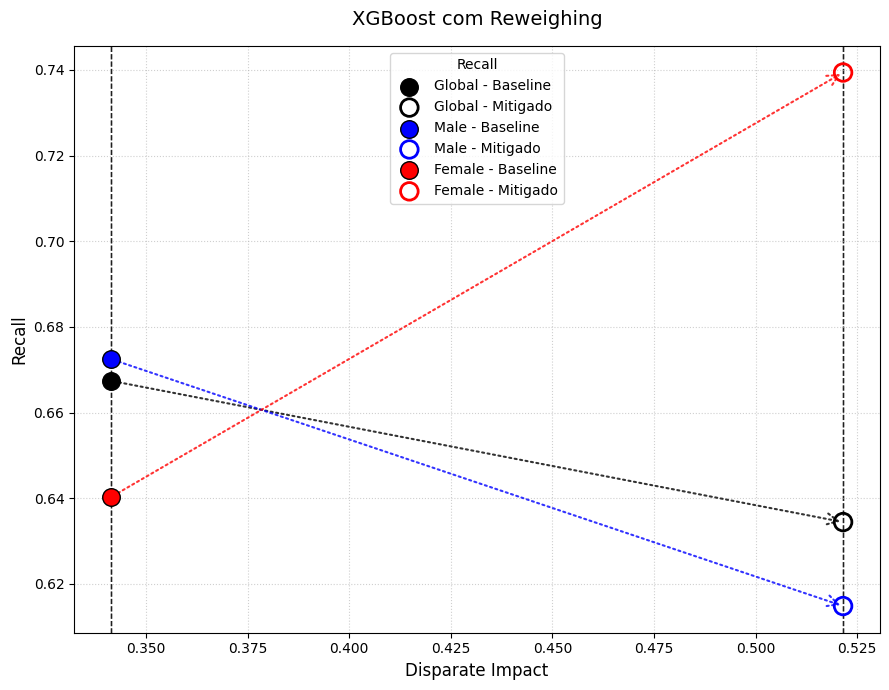

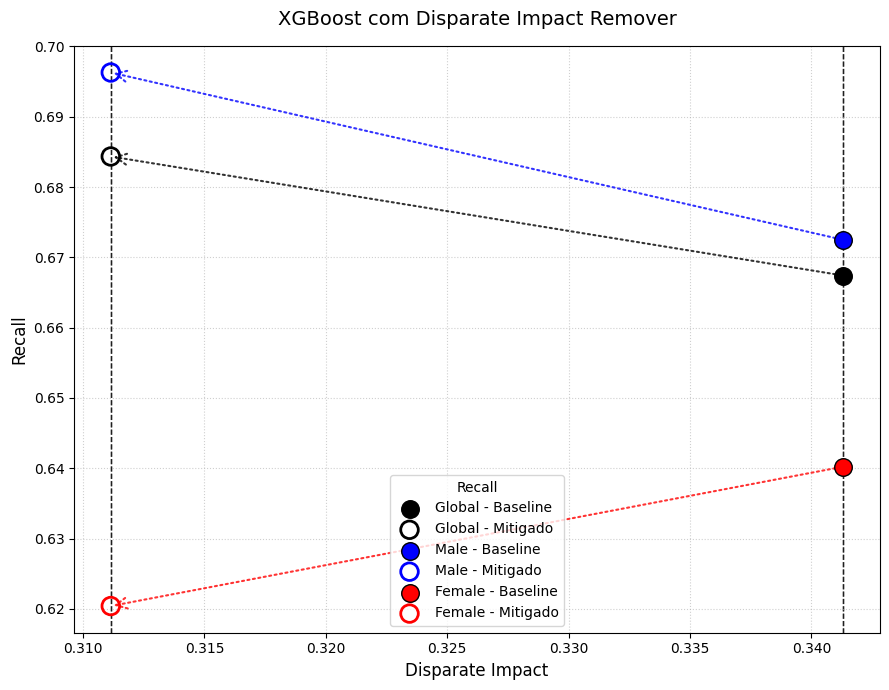

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def plot_detailed_mitigation(df, model_key, metric_x, metric_y_base, metric_y_priv, metric_y_unpriv, pre_val, post_val):

    # Cores consistentes para facilitar a leitura
    groups = {
        'global': {'color': 'black', 'label': 'Global'},
        'priv':   {'color': 'blue', 'label': 'Male'},
        'unpriv': {'color': 'red', 'label': 'Female'}
    }

    plt.figure(figsize=(9, 7))
    ax = plt.gca()

    # 1. Filtro de dados
    base_df = df[(df['model'] == model_key) & (df['pre'] == 'none') & (df['post'] == 'none')]
    mitig_df = df[(df['model'] == model_key) & (df['pre'] == pre_val) & (df['post'] == post_val)]

    if base_df.empty or mitig_df.empty:
        print(f"Atenção: Dados insuficientes para {model_key} com {pre_val}/{post_val}")
        return

    b_row = base_df.iloc[0]
    m_row = mitig_df.iloc[0]

    # 2. Definição dos pontos
    points_to_plot = [
        (b_row[metric_x], b_row[metric_y_base], m_row[metric_x], m_row[metric_y_base], 'global'),
        (b_row[metric_x], b_row[metric_y_priv], m_row[metric_x], m_row[metric_y_priv], 'priv'),
        (b_row[metric_x], b_row[metric_y_unpriv], m_row[metric_x], m_row[metric_y_unpriv], 'unpriv')
    ]

    # 3. Plotagem
    for x_base, y_base, x_mitig, y_mitig, group in points_to_plot:
        color = groups[group]['color']
        label = groups[group]['label']

        # Linha de deslocamento
        plt.annotate('',
                     xy=(x_mitig, y_mitig),
                     xytext=(x_base, y_base),
                     arrowprops=dict(arrowstyle='->, head_length=0.8, head_width=0.4', color=color, lw=1.5, alpha=0.8, ls=':'))



        plt.axvline(x=m_row[metric_x], color='black', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
        plt.axvline(x=b_row[metric_x], color='black', linestyle='--', linewidth=1, alpha=0.5, zorder=1)

        # Ponto Baseline (Preenchido)
        plt.scatter(x_base, y_base, color=color, s=160, edgecolors='black',
                    label=f"{label} - Baseline", zorder=4)

        #Ponto Mitigado (Vazado)
        plt.scatter(x_mitig, y_mitig, color=color, facecolors='none', edgecolors=color, s=160,
                    linewidth=2, label=f"{label} - Mitigado", zorder=3)



    # Ajustes finais
    method_name = f"{pre_val} + {post_val}".replace('none', '').replace(' + ', '').strip()

    plt.title(f"{model_map[model_key]} com {method_map_extenso[method_name]}", fontsize=14, pad=15)

    plt.xlabel(metric_map[metric_x].title(), fontsize=12)
    plt.ylabel(metric_map[metric_y_base].title(), fontsize=12)

    plt.grid(True, linestyle=":", alpha=0.6)

    # Legenda fora do gráfico para não obstruir os pontos
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    #plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='best',title=f"{metric_map[metric_y_base]}")
    plt.legend(title=f"{metric_map[metric_y_base]}")


    plt.tight_layout()
    filename = f"result_grupos_{metric_y_base}_{method_name}_{model_key}_{metric_x}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# --- EXEMPLOS DE USO ---


# Para Precision:
plot_detailed_mitigation(df, "xgboost", "demographic_parity_ratio",
                         "precision", "precision_privileged", "precision_unprivileged",
                         "reweighing", "none")

plot_detailed_mitigation(df, "xgboost", "demographic_parity_ratio",
                         "precision", "precision_privileged", "precision_unprivileged",
                         "disparate_impact_remover", "none")


plot_detailed_mitigation(df, "xgboost", "demographic_parity_ratio",
                         "precision", "precision_privileged", "precision_unprivileged",
                         "none", "equalized_odds_postprocessing")

plot_detailed_mitigation(df, "xgboost", "demographic_parity_ratio",
                         "precision", "precision_privileged", "precision_unprivileged",
                         "none", "reject_option_classification")

plot_detailed_mitigation(df, "xgboost", "demographic_parity_ratio",
                         "recall", "recall_privileged", "recall_unprivileged",
                         "reweighing", "none")

plot_detailed_mitigation(df, "xgboost", "demographic_parity_ratio",
                         "recall", "recall_privileged", "recall_unprivileged",
                         "disparate_impact_remover", "none")


plot_detailed_mitigation(df, "xgboost", "demographic_parity_ratio",
                         "recall", "recall_privileged", "recall_unprivileged",
                         "none", "equalized_odds_postprocessing")

plot_detailed_mitigation(df, "xgboost", "demographic_parity_ratio",
                         "recall", "recall_privileged", "recall_unprivileged",
                         "none", "reject_option_classification")



# Para Recall:
#plot_detailed_mitigation(df, "xgboost", "demographic_parity_ratio",
#                         "recall", "recall_privileged", "recall_unprivileged",
#                         "none", "equalized_odds_postprocessing")

# Para Precision:
#plot_detailed_mitigation(df, "xgboost", "demographic_parity_ratio",
#                         "precision", "precision_privileged", "precision_unprivileged",
#                         "disparate_impact_remover", "none")

## Para Recall:
#plot_detailed_mitigation(df, "xgboost", "demographic_parity_ratio",
#                         "recall", "recall_privileged", "recall_unprivileged",
#                         "disparate_impact_remover", "none")


# Para Precision:
#plot_detailed_mitigation(df, "xgboost", "demographic_parity_ratio",
#                         "precision", "precision_privileged", "precision_unprivileged",
#                         "none", "reject_option_classification")

# Para Recall:
#plot_detailed_mitigation(df, "xgboost", "demographic_parity_ratio",
#                         "recall", "recall_privileged", "recall_unprivileged",
#                         "none", "reject_option_classification")



# Best Performance vs Best Fairness

#  Comportamento da métrica por mitigação e todos modelo

In [ ]:
def plot_mitigation_metric (df, metric,legend=True):
    # === 1. Gera nomes de mitigação ===
    df["mitigation"] = df.apply(get_mitig_name, axis=1)

    # === 2. Aplica o mapeamento de nomes aos modelos ===
    df["model_label"] = df["model"].map(model_map).fillna(df["model"])

    # === NOVO: Define a ordem categórica baseada no model_map ===
    # Pegamos os valores (labels) na ordem em que foram definidos no dicionário
    ordem_dos_modelos = [v for v in model_map.values() if v in df["model_label"].unique()]

    df["model_label"] = pd.Categorical(
        df["model_label"],
        categories=ordem_dos_modelos,
        ordered=True
    )

    # === 3. Ordena por mitigação e depois pelo modelo (respeitando a categoria) ===
    df = df.sort_values(["mitigation", "model_label"])

    # === 4. Define marcadores diferentes para cada mitigação ===
    mitigs = df["mitigation"].unique()
    marker_map = {m: markers_mitigation[i % len(markers_mitigation)] for i, m in enumerate(mitigs)}

    # === Mapa de cores ===
    color_map = {m: None for m in mitigs}
    BASE = "Baseline"
    if BASE in mitigs:
        marker_map[BASE] = '*'
        color_map[BASE] = "black"

    # === 5. Converte modelos para posições numéricas ===
    # Como df["model_label"] é categórico, unique() retornará na ordem das categorias!
    model_order = df["model_label"].unique()
    x_positions = {model: i for i, model in enumerate(model_order)}

    plt.figure(figsize=(12,6))

    # === 6. Plota os pontos (com jitter horizontal) ===
    # observed=True evita avisos com colunas categóricas
    for mitigation, group in df.groupby("mitigation", observed=True):
        x = [x_positions[m] + np.random.uniform(-0.30, 0.30) for m in group["model_label"]]
        plt.scatter(
            x,
            group[metric],
            marker=marker_map[mitigation],
            color=color_map[mitigation],
            s=80,
            label=mitigation,
            alpha=0.8
        )

    # === 7. Linhas verticais para separar modelos ===
    for i in range(len(model_order)):
        if i > 0:
            plt.axvline(x=i - 0.5, color='gray', linestyle='--', alpha=0.3)

    # === 8. Personalização dos eixos e estilo ===
    plt.xticks(range(len(model_order)), model_order)
    plt.ylabel(metric_map.get(metric, metric))
    plt.title(f"{metric_map.get(metric, metric)} por modelo e técnica de mitigação")
    plt.grid(True, linestyle="--", alpha=0.4, axis='y')
    if legend:
      #plt.legend(title="Mitigação", bbox_to_anchor=(1.05, 1), loc='lower center')# loc='upper left')
      plt.legend(
        loc="lower center",
        bbox_to_anchor=(0.5, -0.25),  # Ajuste vertical aqui
        ncol=5,
        fontsize=11,
        frameon=True,
        title="Mitigação"
      )

    #plt.tight_layout()

    filename_all = "result_model_mitig_" + metric
    plt.savefig(filename_all, dpi=300, bbox_inches="tight")
    plt.show()


plot_mitigation_metric(df, "precision", False)
plot_mitigation_metric(df, "recall",False)
plot_mitigation_metric(df, "f1-score",True)

#plot_mitigation_metric(df, "demographic_parity_ratio",False)


#plot_mitigation_metric(df, "balanced_accuracy")
#plot_mitigation_metric(df, "precision")
#plot_mitigation_metric(df, "recall")
#plot_mitigation_metric(df, "f1-score")
#plot_mitigation_metric(df, "statistical_parity_difference")
#plot_mitigation_metric(df, "demographic_parity_ratio")
#plot_mitigation_metric(df, "equalized_odds_difference")
#plot_mitigation_metric(df, "average_predictive_value_difference")

In [ ]:


def plot_best_tradeoff_grid(df, metric_pairs, max_cols=2, point_color="red"):
    n_plots = len(metric_pairs)
    n_cols = min(max_cols, n_plots)
    n_rows = (n_plots + n_cols - 1) // n_cols

    figsize_mult=(6, 6)

    # Isso garante que os 'quadrados' sejam respeitados e alinhados entre si
    fig, axes = plt.subplots(n_rows, n_cols,
                             #figsize=(figsize_mult[0]*n_cols, figsize_mult[1]*n_rows),
                             figsize=(10,10),
                             constrained_layout=False)

    if n_plots > 1:
        axes = np.array(axes).reshape(-1)
    else:
        axes = [axes]

    model_list = df["model"].unique()
    model_marker_map = dict(zip(model_list, markers_models))

    def pipeline_description(row):
        pre = method_map.get(row["pre"], row["pre"])
        post = method_map.get(row["post"], row["post"])
        return f"{model_map[row['model']]} ({pre} - {post})"

    for idx, (metric_x, metric_y) in enumerate(metric_pairs):
        ax = axes[idx]
        no_discrimination_line = 1.0

        best_points = []
        for model_name, group in df.groupby("model"):
            # Performance (Primeiro)
            idx_best_perf = group[metric_y].idxmax()
            row_perf = group.loc[idx_best_perf].copy()
            row_perf["best_type"] = "best performance"
            row_perf["legend_label"] = pipeline_description(row_perf) + " "  #+ " (Perf.)" # como pega idmax e apresenta modelos únicos, não vai mostrar quando o melhor performance ser o melhor justiça. Então diferenciei com  um e dois espaços.
            best_points.append(row_perf)

            # Justiça (Segundo)
            idx_best_fairness = (group[metric_x] - 1).abs().idxmin()
            row_fair = group.loc[idx_best_fairness].copy()
            row_fair["best_type"] = "best fairness"
            row_fair["legend_label"] = pipeline_description(row_fair) + "  " # (Jus)"
            best_points.append(row_fair)

        best_df = pd.DataFrame(best_points)

        # Linhas
        for model_name, group in best_df.groupby("model"):
            if len(group) >= 2:
                ax.plot(group[metric_x], group[metric_y], linestyle="--", color="gray", alpha=0.4, zorder=1)

        # Pontos
        for _, row in best_df.iterrows():
            marker = model_marker_map[row["model"]]
            is_performance = row["best_type"] == "best performance"
            facecolor = point_color if is_performance else "white"
            z_ord = 3 if is_performance else 2

            ax.scatter(
                row[metric_x], row[metric_y],
                marker=marker, s=100, facecolors=facecolor, edgecolors="black",
                alpha=0.9, label=row["legend_label"], zorder=z_ord
            )

        ax.set_xlabel(metric_map.get(metric_x, metric_x),fontsize=12)
        ax.set_ylabel(metric_map.get(metric_y, metric_y),fontsize=12)
        # ax.set_title(f"Performance vs Justiça") # Opcional: remover titulo ajuda a alinhar se estiver apertado
        ax.grid(True, linestyle="--", alpha=0.5)
        ax.axvline(x=no_discrimination_line, color="red", linestyle="--", linewidth=1, alpha=0.7)

        # --- ALTERAÇÃO 2: Força Quadrado Perfeito ---
        ax.set_box_aspect(1)

        # Legenda
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))

    # Coletar todas as legendas de todos os subplots
    handles, labels = [], []
    for ax in axes:
        h, l = ax.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

    # Remover duplicadas
    by_label = dict(zip(labels, handles))

    # Legenda global ancorada na FIGURA (não interfere no tamanho dos subplots)
    fig.legend(
        by_label.values(),
        by_label.keys(),
        loc="upper center",
        bbox_to_anchor=(0.5, 0.02),   # Ajuste vertical aqui
        ncol=2,
        fontsize=11,
        frameon=True,
        title="Modelos"
    )

    for j in range(idx + 1, len(axes)):
        axes[j].axis("off")


    name_file_best = "result_best_perf_just_"+ metric_x +"_"+ metric_y
    plt.savefig(name_file_best, dpi=300, bbox_inches="tight")

    plt.show()


plot_best_tradeoff_grid(df,  [("demographic_parity_ratio", "precision")], max_cols=3, point_color="blue")
plot_best_tradeoff_grid(df,  [("demographic_parity_ratio", "recall")], max_cols=3, point_color = "red")
plot_best_tradeoff_grid(df,  [("demographic_parity_ratio", "f1-score")], max_cols=3, point_color="green")


#plot_best_tradeoff_grid(df,  [("demographic_parity_ratio", "balanced_accuracy")], max_cols=3)
#plot_best_tradeoff_grid(df,  [("demographic_parity_ratio", "f1-score")], max_cols=3)

#plot_best_tradeoff_grid(df,  [("average_predictive_value_difference", "precision")], max_cols=3)
#plot_best_tradeoff_grid(df,  [("demographic_parity_ratio", "balanced_accuracy")], max_cols=3)
#plot_best_tradeoff_grid(df,  [("equal_odds_ratio", "balanced_accuracy")], max_cols=3)
#plot_best_tradeoff_grid(df,  [("average_predictive_value_difference", "balanced_accuracy")], max_cols=3)
#plot_best_tradeoff_grid(df,  [("demographic_parity_ratio", "precision")], max_cols=3)






# Fronteira de pareto global




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_front_paretto_global (metric_x, metric_y):
	# ============================================================
	# 1. Função de fronteira de Pareto
	# ============================================================
	def compute_pareto_front(df, metric_x, metric_y, maximize_y=True, target_x=1.0):
		"""
		Retorna os pontos da fronteira de Pareto.
		metric_x -> distância do fairness até o valor neutro (ex.: |DI - 1|)
		metric_y -> métrica de performance
		"""
		# Quanto menor a distância da fairness, melhor
		df = df.copy()
		df["fairness_dist"] = (df[metric_x] - target_x).abs()

		# Ordena por fairness → depois performance
		df_sorted = df.sort_values(by=["fairness_dist", metric_y], ascending=[True, not maximize_y])

		pareto = []
		best_performance_so_far = -np.inf

		for _, row in df_sorted.iterrows():
			perf = row[metric_y]
			if perf > best_performance_so_far:
				pareto.append(row)
				best_performance_so_far = perf

		return pd.DataFrame(pareto)


	# ============================================================
	# 2. Monta rótulos harmonizados
	# ============================================================
	def mitigation_label(pre, post):
		if pre != "none" and post == "none":
			return method_map.get(pre, pre)
		if pre == "none" and post != "none":
			return method_map.get(post, post)
		if pre != "none" and post != "none":
			return method_map.get(pre, pre) + "+" + method_map.get(post, post)
		return "baseline"


	def full_label(row):
		model_name = model_map.get(row["model"], row["model"])
		pre = method_map.get(row["pre"], row["pre"])
		post = method_map.get(row["post"], row["post"])
		return f"{model_name}\n{pre}+{post}"


	# ============================================================
	# 3. Seleciona fronteira global
	# ============================================================

	pareto_df = compute_pareto_front(df, metric_x, metric_y, maximize_y=True, target_x=1.0)


	# ============================================================
	# 4. Plot da fronteira com balãozinho
	# ============================================================
	plt.figure(figsize=(12, 7))


	# Fronteira
	plt.plot(
		pareto_df[metric_x],
		pareto_df[metric_y],
		marker="o",
		linestyle="--",
		color="red",
		linewidth=2,
		label="Fronteira de Pareto (Global)"
	)

	# Pontos globais
	plt.scatter(df[metric_x], df[metric_y], color="gray", alpha=0.3, label="Todos os experimentos")

	# ------------------------------------------------------------
	#  Balõezinhos (anotações) em cada ponto da fronteira
	# ------------------------------------------------------------
	for _, row in pareto_df.iterrows():
		label = full_label(row)

		# Posição levemente deslocada para não colidir com o ponto
		ann = plt.annotate(
			label,
			(row[metric_x], row[metric_y]),
			textcoords="offset points",
			xytext=(10, -10),
			ha='left',
			fontsize=8,
			bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3")
		)

		ann.draggable()

	# Configurações
	plt.xlabel(metric_map[metric_x])
	plt.ylabel(metric_map[metric_y])
	plt.title("Fronteira de Pareto (Global)\n")
	plt.grid(True, linestyle="--", alpha=0.4)
	plt.legend()
	plt.tight_layout()
	plt.show()



plot_front_paretto_global("demographic_parity_ratio","f1-score")
plot_front_paretto_global("demographic_parity_ratio","precision")
plot_front_paretto_global("demographic_parity_ratio","recall")




# (não coloquei) Fronteira de pareto global MULTIPLAS



# Fronteiras de pareto critérios estatístico de fairness de um modelo

In [ ]:
# @title

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def annotate_point(ax, x, y, text):
    """Cria um balão simples com seta, deslocado para cima e ARRATÁVEL."""
    ann = ax.annotate(
        text,
        (x, y),
        xytext=(10, 12),  # posição inicial
        textcoords="offset points",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.9),
        arrowprops=dict(arrowstyle="->", lw=1),
        fontsize=9
    )
    ann.draggable()  # <-- habilita arrastar com o mouse



def plot_model_scatter(ax, df, model_name, metric_x, metric_y):
    """Plota um modelo e conecta pontos à direita (X crescente) a partir do maior Y."""
    df["mitigation"] = df.apply(get_mitig_name, axis=1)
    df_model = df[df["model"] == model_name].copy()
    if df_model.empty:
        ax.text(0.5, 0.5, f"Sem dados para {model_name}", ha='center', va='center')
        return

    mitigs = df_model["mitigation"].unique()
    marker_map = {m: markers_mitigation[i % len(markers_mitigation)] for i, m in enumerate(mitigs)}

    # === 1. Plota os pontos ===
    for mitigation, group in df_model.groupby("mitigation", observed=True):
        ax.scatter(
            group[metric_x],
            group[metric_y],
            marker=marker_map[mitigation],
            s=100,
            label=mitigation,
            alpha=0.8
        )

    # === 2. Seleciona o ponto de maior Y e conecta só com X maiores ===
    sorted_by_y = df_model.sort_values(by=metric_y, ascending=False)
    x_vals = sorted_by_y[metric_x].values
    y_vals = sorted_by_y[metric_y].values
    mitig_vals = sorted_by_y["mitigation"].values

    x_start, y_start = x_vals[0], y_vals[0]
    selected_points = [(x_start, y_start, mitig_vals[0])]

    for i in range(1, len(x_vals)):
        if x_vals[i] > selected_points[-1][0]:
            selected_points.append((x_vals[i], y_vals[i], mitig_vals[i]))

    # === 3. Traçar linha da fronteira ===
    if len(selected_points) > 1:
        xs = [p[0] for p in selected_points]
        ys = [p[1] for p in selected_points]
        ax.plot(xs, ys, color="black", linestyle="--", linewidth=1.5, alpha=0.7)

    # === 4. Balões SOMENTE nos pontos da fronteira ===
    for x, y, mitig in selected_points:
        annotate_point(ax, x, y, mitig)

    # === 5. Personalização ===
    #ax.set_xlabel(metric_map.get(metric_x, metric_x))
    ax.set_xlabel(metric_map[metric_x])
    ax.set_ylabel(metric_map[metric_y])
    ax.set_title(f"Modelo: {model_map[model_name]}")
    ax.grid(True, linestyle="--", alpha=0.4)


def plot_model_scatter_grid(df, plot_list, max_cols=3):
    n_plots = len(plot_list)
    n_cols = min(max_cols, n_plots)
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
    axes = np.array(axes).reshape(-1)

    for i, (model_name, metric_x, metric_y) in enumerate(plot_list):
        plot_model_scatter(axes[i], df, model_name, metric_x, metric_y)

    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.5, 0.02),   # Ajuste vertical aqui
        ncol=5,
        fontsize=11,
        frameon=True#,
        #title="Mitigação"
    )
    #plt.tight_layout()


    name_file_compara = "img_pareto_criterios_" + model_name
    plt.savefig(name_file_compara, dpi=300, bbox_inches="tight")

    plt.show()


# Execução
plot_model_scatter_grid(df, [
    ("decision_tree", "demographic_parity_ratio", "precision")
])

# Execução
plot_model_scatter_grid(df, [
    ("xgboost", "demographic_parity_ratio", "precision"),
    ("xgboost", "demographic_parity_ratio", "recall"),
    ("xgboost", "demographic_parity_ratio", "f1-score")
])
# Execução
plot_model_scatter_grid(df, [
    ("xgboost", "equal_odds_ratio", "demographic_parity_ratio"),
    ("xgboost", "average_predictive_value_difference", "demographic_parity_ratio"),
    ("xgboost", "average_predictive_value_difference", "equal_odds_ratio")
])

plot_model_scatter_grid(df, [
    ("xgboost", "equalized_odds_difference", "statistical_parity_difference"),
    ("xgboost", "statistical_parity_difference", "average_predictive_value_difference"),
    ("xgboost", "average_predictive_value_difference", "equalized_odds_difference")
])


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_multi_pareto(df, metric_x, metrics_y_list, model_filter='global', target_x=1.0):
    """
    Plota múltiplas fronteiras de Pareto em um único gráfico.

    Args:
        df: DataFrame contendo os resultados.
        metric_x: Nome da coluna da métrica de fairness (eixo X).
        metrics_y_list: Lista de métricas de performance (eixo Y).
        model_filter: 'global' para usar todos os dados, ou o nome exato do modelo para filtrar.
        target_x: Valor ideal da métrica de fairness.
    """

    # ============================================================
    # 0. Filtragem por Modelo
    # ============================================================
    if model_filter != 'global':
        # Filtra apenas as linhas do modelo específico
        data_to_plot = df[df['model'] == model_filter].copy()
        title_context = f"Modelo: {model_filter}"
    else:
        # Usa todos os dados
        data_to_plot = df.copy()
        title_context = "Global (Todos os Modelos)"

    # Verificação de segurança (caso o nome do modelo esteja errado)
    if data_to_plot.empty:
        print(f"⚠️ Atenção: Nenhuma linha encontrada para o filtro '{model_filter}'. Verifique o nome.")
        return

    # ============================================================
    # 1. Função auxiliar interna
    # ============================================================
    def compute_pareto_front(data, col_x, col_y, maximize_y=True, target_x=1.0):
        temp_df = data.copy()
        temp_df["fairness_dist"] = (temp_df[col_x] - target_x).abs()

        # Ordena: 1º menor erro de fairness, 2º melhor performance
        temp_df = temp_df.sort_values(by=["fairness_dist", col_y], ascending=[True, not maximize_y])

        pareto_points = []
        best_performance_so_far = -np.inf

        for _, row in temp_df.iterrows():
            perf = row[col_y]
            if perf > best_performance_so_far:
                pareto_points.append(row)
                best_performance_so_far = perf

        return pd.DataFrame(pareto_points)

    # ============================================================
    # 2. Configuração da Figura
    # ============================================================
    plt.figure(figsize=(8, 6))
    colors = plt.cm.tab10(np.linspace(0, 1, len(metrics_y_list)))

    # ============================================================
    # 3. Loop para desenhar cada métrica Y
    # ============================================================
    for i, current_metric_y in enumerate(metrics_y_list):

        # Calcula Pareto usando apenas os dados filtrados (data_to_plot)
        pareto_df = compute_pareto_front(data_to_plot, metric_x, current_metric_y, maximize_y=True, target_x=target_x)

        # Define label da legenda
        label_name = metric_map.get(current_metric_y, current_metric_y) if 'metric_map' in globals() else current_metric_y

        current_marker = markers_metric[i % len(markers_metric)]

        # Plota
        plt.plot(
            pareto_df[metric_x],
            pareto_df[current_metric_y],
            marker = current_marker,
            linestyle='--',
            linewidth=0.5,
            label=label_name,
            color=colors[i]
        )

    # ============================================================
    # 4. Configurações Finais
    # ============================================================
    x_label = metric_map.get(metric_x, metric_x) if 'metric_map' in globals() else metric_x

    plt.xlabel(f"{x_label}", fontsize=12)
    plt.ylabel("Métricas de Desempenho", fontsize=12)
    plt.title(f"Fronteiras de Pareto \n {title_context}", fontsize=12)

    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend(title="Métricas (Y)", fontsize=10)
    plt.tight_layout()
    plt.show()

# ==============================================================================
# Exemplos de uso:
# ==============================================================================

metricas = ["balanced_accuracy", "precision", "recall", "f1-score", "roc_auc"]
plot_multi_pareto(df, "demographic_parity_ratio", metricas, model_filter='xgboost') #global mostra todos




# Comportamento da métrica de performance com duas métricas de fairness

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_model_scatter(metricx, metricy, metricz):

    # Dicionário de marcadores por modelo
    marker_map = {model: markers_models[i % len(markers_models)] for i, model in enumerate(df["model"].unique())}

    plt.figure(figsize=(10,6))

    # Define o range de cores baseado no TOTAL dos dados de metricz para consistência
    vmin = df[metricz].min()
    vmax = df[metricz].max()
    cmap = plt.get_cmap("viridis_r")

    #cmap = plt.get_cmap("gray")
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

    # Plotando os pontos
    for model, group in df.groupby("model"):
        plt.scatter(
            group[metricx],
            group[metricy],
            c=group[metricz],   # <--- CORREÇÃO: Usando a variável metricz
            cmap=cmap,
            norm=norm,          # Garante que a escala de cor seja global
            s=120,
            alpha=0.9,
            edgecolors='k',     # Opcional: Borda preta fina para contraste
            linewidth=0.5,
            marker=marker_map[model]
            # label=model       # REMOVIDO: Para não gerar legenda colorida automática
        )

    # Linhas de referência
    plt.axvline(1.0, color="black", linestyle=":", label=f"{metricx} = 1")
    plt.axhline(1.0, color="red", linestyle=":", label=f"{metricy} = 1")

    plt.xlabel(metric_map[metricx])
    plt.ylabel(metric_map[metricy])
    plt.title(f"Trade-off: {metric_map[metricx]} vs {metric_map[metricy]}")

    # Barra de cores (Colorbar)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=plt.gca(), label=metric_map[metricz])

    # Legenda Customizada (Apenas formas, cor preta)
    legend_handles = []
    for model in sorted(df["model"].unique()):
        # Cria um objeto Line2D 'falso' apenas para a legenda

        handle = mlines.Line2D([], [],
                               color='black',               # Cor da linha (invisível aqui)
                               marker=marker_map[model],    # O marcador do modelo
                               linestyle='None',            # Sem linha
                               markersize=10,
                               markerfacecolor='none',      # <--- Sem preenchimento
                               markeredgecolor='black',     # <--- Borda preta
                               label=model)
        legend_handles.append(handle)

    plt.legend(handles=legend_handles, title="Modelos")

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()

    name_file_compara = "img_compara_" + metricx+"_"+metricy+"_"+metricz
    plt.savefig(name_file_compara, dpi=300, bbox_inches="tight")

    plt.show()

# Exemplo de chamada


plot_model_scatter("equal_odds_ratio", "demographic_parity_ratio",  "average_predictive_value_difference")
#plot_model_scatter("average_predictive_value_difference", "demographic_parity_ratio",  "equal_odds_ratio")
#plot_model_scatter("average_predictive_value_difference", "equal_odds_ratio",  "demographic_parity_ratio")


# fronteira - obsoleto

---



In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def plot_model_scatter(ax, df, model_name, metric_x, metric_y):
    """Plota um modelo e conecta pontos à direita (X crescente) a partir do maior Y."""
    df["mitigation"] = df.apply(get_mitig_name, axis=1)
    df_model = df[df["model"] == model_name].copy()
    if df_model.empty:
        ax.text(0.5, 0.5, f"Sem dados para {model_name}", ha='center', va='center')
        return

    mitigs = df_model["mitigation"].unique()
    marker_map = {m: markers_mitigation[i % len(markers_mitigation)] for i, m in enumerate(mitigs)}

    # === 1. Plota os pontos ===
    for mitigation, group in df_model.groupby("mitigation", observed=True):
        ax.scatter(
            group[metric_x],
            group[metric_y],
            marker=marker_map[mitigation],
            s=100,
            label=mitigation,
            alpha=0.8
        )

    # === 2. Seleciona o ponto de maior Y e conecta só com X maiores ===
    sorted_by_y = df_model.sort_values(by=metric_y, ascending=False)
    x_vals = sorted_by_y[metric_x].values
    y_vals = sorted_by_y[metric_y].values

    # Começa do ponto de maior Y
    x_start, y_start = x_vals[0], y_vals[0]
    selected_points = [(x_start, y_start)]

    # Para cada ponto restante, conecta apenas se X for maior que o último X
    for i in range(1, len(x_vals)):
        if x_vals[i] > selected_points[-1][0]:
            selected_points.append((x_vals[i], y_vals[i]))

    # === 3. Traça a linha só entre esses pontos ===
    if len(selected_points) > 1:
        xs = [p[0] for p in selected_points]
        ys = [p[1] for p in selected_points]
        ax.plot(xs, ys, color="black", linestyle="--", linewidth=1.5, alpha=0.7)

    # === 4. Personalização ===
    ax.set_xlabel(metric_map.get(metric_x, metric_x))
    ax.set_ylabel(metric_map.get(metric_y, metric_y))
    ax.set_title(f"{model_name}\n{metric_y} vs {metric_x}")
    ax.grid(True, linestyle="--", alpha=0.4)


def plot_model_scatter_grid(df, plot_list, max_cols=3):
    """
    Gera uma grade de gráficos lado a lado.
    plot_list: lista de tuplas (model_name, metric_x, metric_y)
    """
    n_plots = len(plot_list)
    n_cols = min(max_cols, n_plots)
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
    axes = np.array(axes).reshape(-1)

    for i, (model_name, metric_x, metric_y) in enumerate(plot_list):
        plot_model_scatter(axes[i], df, model_name, metric_x, metric_y)

    # Remove eixos não usados
    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    # Legenda única
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title="Mitigação", bbox_to_anchor=(1.02, 1), loc='upper left')


    plt.tight_layout()
    plt.show()

#print(df.columns.tolist())

plot_model_scatter_grid(df, [

    ("xgboost",  "demographic_parity_ratio", "balanced_accuracy"),
    ("xgboost", "equal_odds_ratio", "balanced_accuracy" ),
    ("xgboost", "average_predictive_value_difference", "balanced_accuracy" ),
    ("xgboost",  "demographic_parity_ratio", "precision"),
    ("xgboost", "equal_odds_ratio", "precision" ),
    ("xgboost", "average_predictive_value_difference", "precision" ),
    ("xgboost",  "demographic_parity_ratio", "recall"),
    ("xgboost", "equal_odds_ratio", "recall" ),
    ("xgboost", "average_predictive_value_difference", "recall" ),
    ("xgboost",  "demographic_parity_ratio", "f1-score"),
    ("xgboost", "equal_odds_ratio", "f1-score" ),
    ("xgboost", "average_predictive_value_difference", "f1-score" ),
    ("xgboost",  "demographic_parity_ratio", "roc_auc"),
    ("xgboost", "equal_odds_ratio", "roc_auc"),
    ("xgboost", "average_predictive_value_difference", "roc_auc" )
])

plot_model_scatter_grid(df, [

    ("xgboost", "equal_odds_ratio", "demographic_parity_ratio"),
    ("xgboost", "average_predictive_value_difference", "demographic_parity_ratio") ,
    ("xgboost", "average_predictive_value_difference","equal_odds_ratio")
])


In [ ]:
def plot_model_scatter(metricx, metricy,metricz):

    # Dicionário de marcadores por modelo
    marker_map = {model: markers_models[i % len(markers_models)] for i, model in enumerate(df["model"].unique())}

    plt.figure(figsize=(10,6))

    for model, group in df.groupby("model"):
        plt.scatter(
            group[metricx],
            group[metricy],
            c=group["accuracy"],
            cmap="viridis",
            s=120,
            alpha=0.9,
            marker=marker_map[model],
            label=model
        )

    # Linhas de referência
    plt.axvline(1.0, color="black", linestyle=":", label=metricx + " =" +" 1 (equidade perfeita)") ###################### aqui fazer um dicionário para cada métrica e a linha de perfeição.
    plt.axhline(1.0, color="red", linestyle=":", label=metricy + " =" +" 1 (equidade perfeita)")

    plt.xlabel(metricx)
    plt.ylabel(metricy)
    plt.title("Trade-off: "+ metricx +" vs "+ metricy )
    plt.colorbar(label=metricz)
    plt.legend(title="Modelos")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_model_scatter ("demographic_parity_ratio",  "equal_odds_ratio", "accuracy")